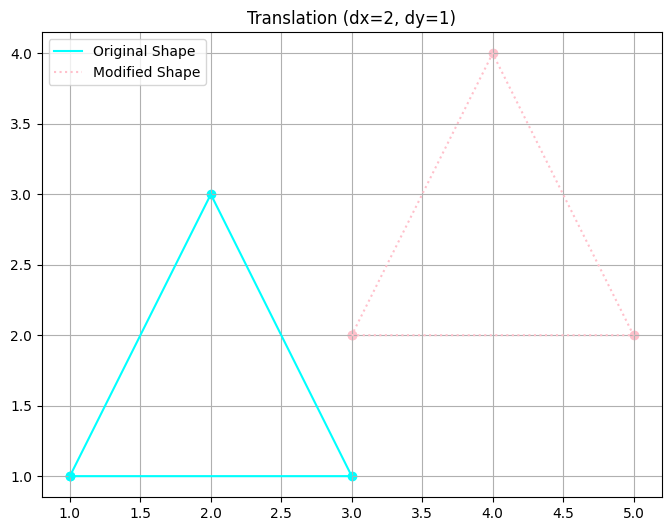

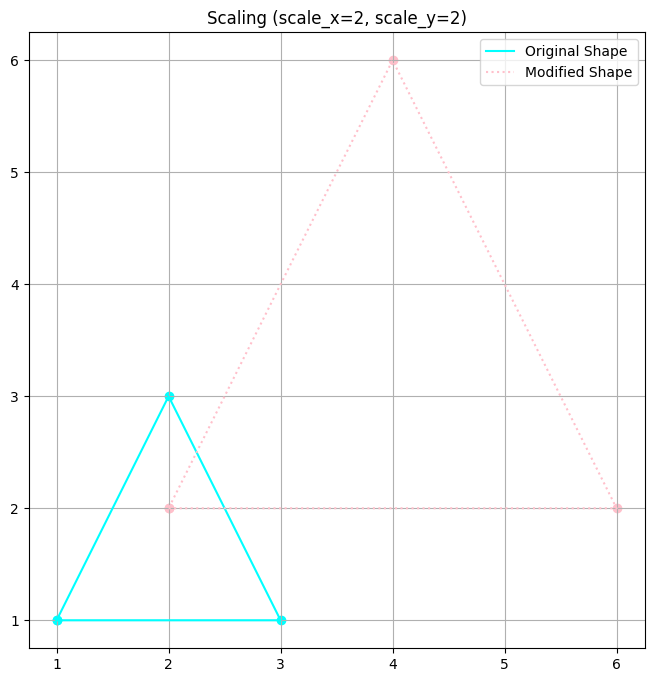

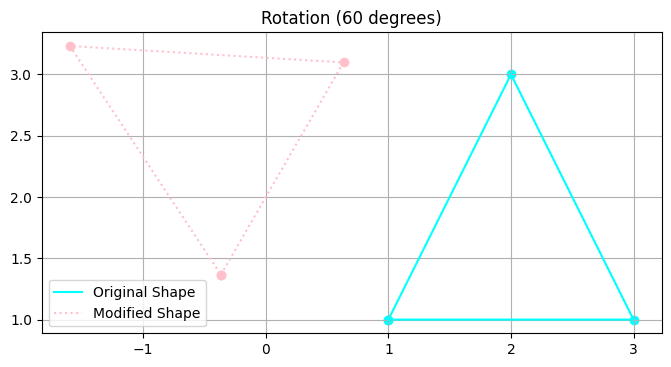

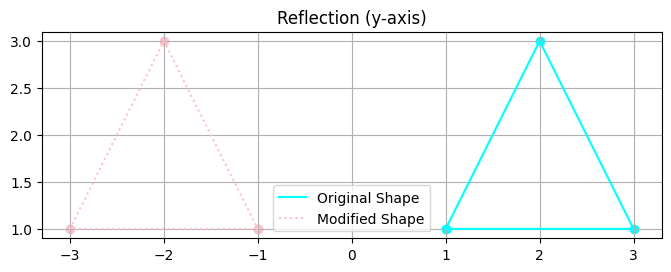

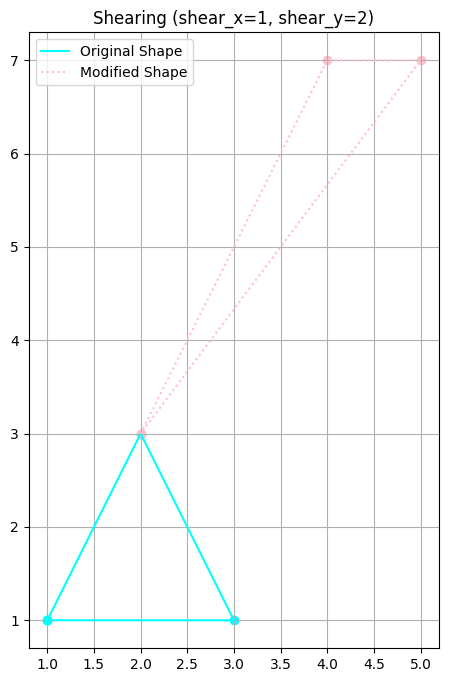

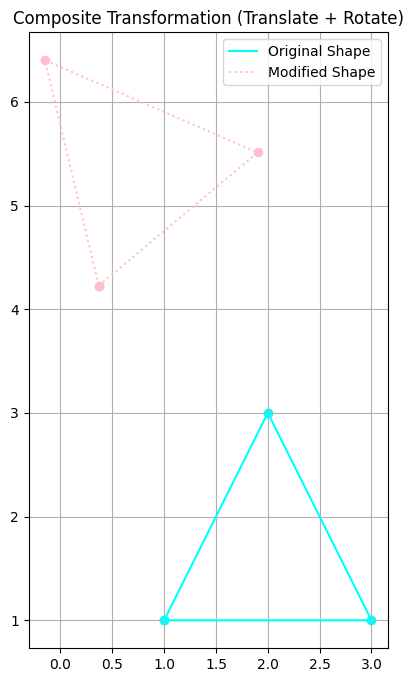

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_transformed_shapes(original, transformed, title, label1='Original Shape', label2='Modified Shape', color1='aqua', color2='pink'):
    original = np.vstack((original, original[0]))
    transformed = np.vstack((transformed, transformed[0]))

    plt.figure(figsize=(8, 8))
    plt.plot(original[:, 0], original[:, 1], label=label1, color=color1)
    plt.scatter(original[:, 0], original[:, 1], color=color1)

    plt.plot(transformed[:, 0], transformed[:, 1], label=label2, color=color2, linestyle='dotted')
    plt.scatter(transformed[:, 0], transformed[:, 1], color=color2)

    plt.title(title)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

def translate(points, dx, dy):
    transformation_matrix = np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

def scale(points, scale_x, scale_y):
    transformation_matrix = np.array([[scale_x, 0, 0], [0, scale_y, 0], [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

def rotate(points, degrees):
    radians = np.radians(degrees)
    transformation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0], [np.sin(radians), np.cos(radians), 0], [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

def reflect(points, axis='x'):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    else:
        transformation_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

def shear(points, shear_x, shear_y):
    transformation_matrix = np.array([[1, shear_x, 0], [shear_y, 1, 0], [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

def apply_transformation(points, matrix):
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogeneous_points @ matrix.T
    return transformed_points[:, :2]

# Define a triangle
shape = np.array([[1, 1], [3, 1], [2, 3]])

# Translation
translated_shape = translate(shape, 2, 1)
plot_transformed_shapes(shape, translated_shape, "Translation (dx=2, dy=1)")

# Scaling
scaled_shape = scale(shape, 2, 2)
plot_transformed_shapes(shape, scaled_shape, "Scaling (scale_x=2, scale_y=2)")

# Rotation
rotated_shape = rotate(shape, 60)
plot_transformed_shapes(shape, rotated_shape, "Rotation (60 degrees)")

# Reflection
reflected_shape = reflect(shape, axis='y')
plot_transformed_shapes(shape, reflected_shape, "Reflection (y-axis)")

# Shearing
sheared_shape = shear(shape, 1, 2)
plot_transformed_shapes(shape, sheared_shape, "Shearing (shear_x=1, shear_y=2)")

# Composite Transformation
composite_shape = rotate(translate(shape, 2, 2), 40)
plot_transformed_shapes(shape, composite_shape, "Composite Transformation (Translate + Rotate)")


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the input image
img = cv2.imread('/content/Screenshot 2025-01-23 100041.png')
if img is None:
    print("Unable to locate the image.")
else:
    show_image("Input Image", img)

# 1. Translate the image
def shift_image(img, dx, dy):
    rows, cols = img.shape[:2]
    trans_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
    result = cv2.warpAffine(img, trans_matrix, (cols, rows))
    return result

translated_img = shift_image(img, 50, 30)
show_image("Translated Image (dx=50, dy=30)", translated_img)

# 2. Reflect the image
def flip_image(img, direction='x'):
    if direction == 'x':
        return cv2.flip(img, 0)
    elif direction == 'y':
        return cv2.flip(img, 1)
    else:
        return cv2.flip(img, -1)

reflected_img_x = flip_image(img, 'x')
show_image("Reflected Image (Horizontal)", reflected_img_x)

# 3. Rotate the image
def rotate_img(img, angle):
    rows, cols = img.shape[:2]
    rot_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, rot_matrix, (cols, rows))

rotated_img = rotate_img(img, 45)
show_image("Rotated Image (45°)", rotated_img)

# 4. Scale the image
def resize_image(img, scale_x, scale_y):
    return cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

scaled_img = resize_image(img, 15, 5)
show_image("Resized Image (fx=15, fy=5)", scaled_img)

# 5. Crop the image
def extract_region(img, x_start, y_start, width, height):
    return img[y_start:y_start+height, x_start:x_start+width]

cropped_img = extract_region(img, 50, 50, 200, 150)
show_image("Cropped Region", cropped_img)

# 6. Shear image along X-axis
def shear_along_x(img, factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, factor, 0], [0, 1, 0]])
    new_width = cols + int(rows * factor)
    return cv2.warpAffine(img, shear_matrix, (new_width, rows))

sheared_img_x = shear_along_x(img, 0.3)
show_image("X-Axis Shear", sheared_img_x)

# 7. Shear image along Y-axis
def shear_along_y(img, factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [factor, 1, 0]])
    new_height = rows + int(cols * factor)
    return cv2.warpAffine(img, shear_matrix, (cols, new_height))

sheared_img_y = shear_along_y(img, 0.3)
show_image("Y-Axis Shear", sheared_img_y)


Output hidden; open in https://colab.research.google.com to view.